In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import numpy
import pandas as pd
from keras.models import load_model
import streamlit as st
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("nepse_data.csv")

In [3]:
data.dropna(inplace=True)

In [4]:
data=data.reset_index()['Close']

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))


In [6]:
##splitting dataset into train and test split
training_size = int(len(data)*0.7)
test_size=len(data)-training_size
data_train = data[0:training_size,:]
data_test = data[training_size:len(data),:]

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
    # reshape into X=t,t+1,t+2,t+3 and Y=t+4
    time_step = 100
    X_train, y_train = create_dataset(data_train, time_step)
    X_test, y_test = create_dataset(data_test, time_step)

In [9]:
    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1))))
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100))
model.add(Dense(units=1))  # Output layer with 7 units for predicting 7 days ahead



model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

11/11 [==============================] - 13s 469ms/step - loss: 0.1100 - val_loss: 0.0098
Epoch 2/100
11/11 [==============================] - 3s 305ms/step - loss: 0.0206 - val_loss: 0.0174
Epoch 3/100
11/11 [==============================] - 3s 305ms/step - loss: 0.0131 - val_loss: 0.0215
Epoch 4/100
11/11 [==============================] - 3s 304ms/step - loss: 0.0082 - val_loss: 0.0116
Epoch 5/100
11/11 [==============================] - 3s 314ms/step - loss: 0.0061 - val_loss: 0.0030
Epoch 6/100
11/11 [==============================] - 3s 313ms/step - loss: 0.0040 - val_loss: 3.8118e-04
Epoch 7/100
11/11 [==============================] - 3s 314ms/step - loss: 0.0036 - val_loss: 3.5669e-04
Epoch 8/100
11/11 [==============================] - 3s 313ms/step - loss: 0.0034 - val_loss: 2.9321e-04
Epoch 9/100
11/11 [==============================] - 4s 352ms/step - loss: 0.0033 - val_loss: 2.6944e-04
Epoch 10/100
11/11 [==============================] - 4s 340ms/step - los

In [13]:
    ### Lets Do the prediction and check performance metrics
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)

8/8 [==============================] - 0s 38ms/step


In [14]:
    train_predict=scaler.inverse_transform(train_predict)
    test_predict=scaler.inverse_transform(test_predict)

In [15]:
    y_train.reshape(-1,1)

array([[0.47940275],
       [0.47661863],
       [0.48908043],
       [0.50324894],
       [0.50711524],
       [0.52436821],
       [0.53707791],
       [0.50692931],
       [0.5075586 ],
       [0.50223349],
       [0.49750907],
       [0.47506925],
       [0.46927217],
       [0.47528854],
       [0.46322243],
       [0.46547261],
       [0.465854  ],
       [0.45232431],
       [0.45235292],
       [0.47106946],
       [0.46500064],
       [0.47516459],
       [0.50076516],
       [0.5176272 ],
       [0.49048202],
       [0.48490902],
       [0.45525622],
       [0.45299174],
       [0.45968984],
       [0.47235187],
       [0.47375346],
       [0.44883939],
       [0.44645096],
       [0.438623  ],
       [0.42300046],
       [0.41929148],
       [0.39999333],
       [0.39652271],
       [0.3942916 ],
       [0.38205863],
       [0.39034425],
       [0.3650631 ],
       [0.35717316],
       [0.37567994],
       [0.40100877],
       [0.40929439],
       [0.40143306],
       [0.376

In [16]:
    y_train = scaler.inverse_transform(pd.DataFrame(y_train))

In [17]:
    dataaa = pd.read_csv("nepse_data.csv")

    df1 = pd.DataFrame(columns = ['Close', 'train_predict', 'test_predict'])

In [18]:
    # shift train predictions for plotting
    look_back=100
    trainPredictPlot = numpy.empty_like(data)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(data)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

In [19]:

    df1['train_predict'] = trainPredictPlot.tolist()
    df1['test_predict'] = testPredictPlot.tolist()
    df1['Close'] = dataaa['Close']


In [20]:
    df1['train_predict'].dropna()

0       [nan]
1       [nan]
2       [nan]
3       [nan]
4       [nan]
        ...  
1125    [nan]
1126    [nan]
1127    [nan]
1128    [nan]
1129    [nan]
Name: train_predict, Length: 1130, dtype: object

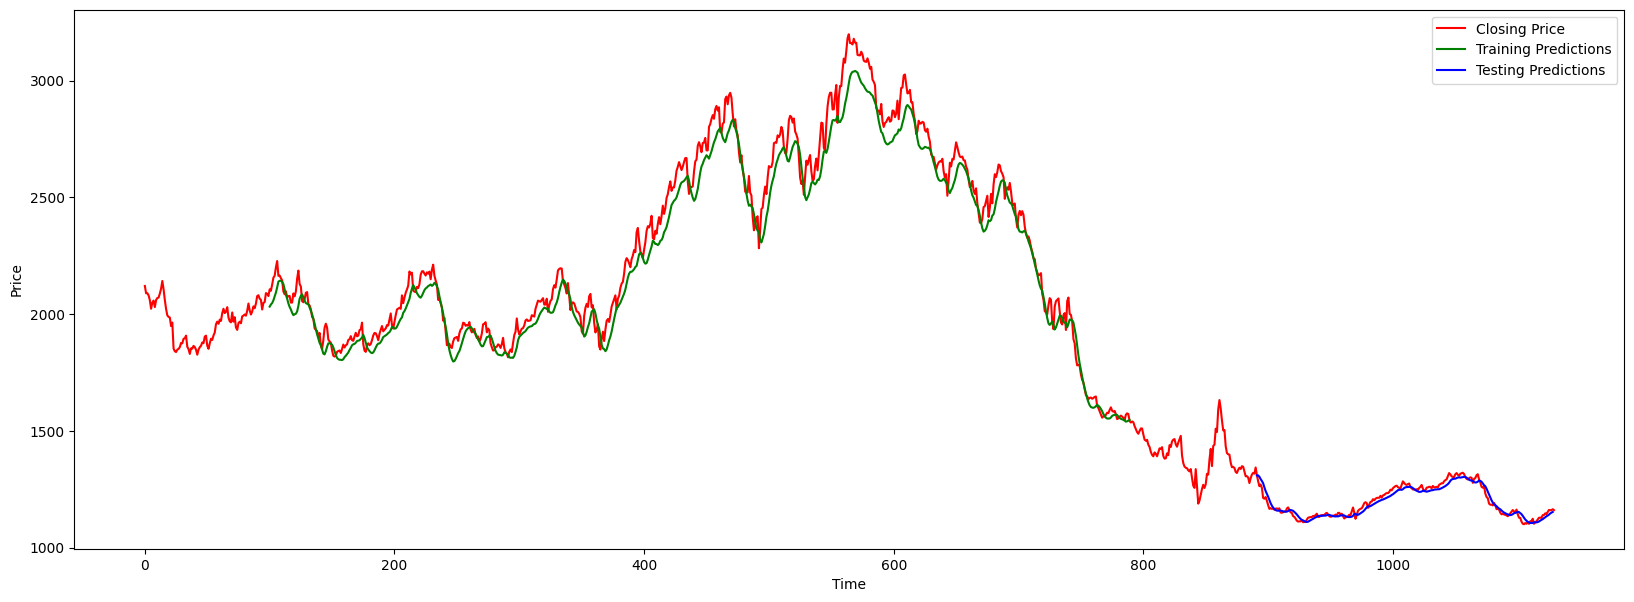

In [21]:
    fig12 = plt.figure(figsize=(20,7))
    plt.plot(df1['Close'], 'r', label='Closing Price')
    plt.plot(trainPredictPlot, 'g', label='Training Predictions')
    plt.plot(testPredictPlot, 'b', label='Testing Predictions')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [22]:
model.save('BILSTM.keras')